# Version 1.0 RecModel Using Simple ANN's 

Import the Libs needed for the script.

In [32]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import keras
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Activation, Dense, Input, Dropout
from keras.layers import Conv2D, Flatten
from keras.models import Model
from keras import backend as K
import os, cv2
import tensorflow as tf
from keras import losses
from keras.optimizers import SGD,RMSprop,adam
from keras.layers import Reshape, Conv2DTranspose, BatchNormalization
from IPython.display import clear_output
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.models import Sequential
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
import keras 
import tensorflow as tf

# Read Clean Dataset

Read the clean data after running the Cleaning_Data.py script to fill missing data and scalerize the features. This makes it easy to work with and make data discrete. 

In [2]:
dataset = pd.read_csv('Clean_Dataset.csv')
print(dataset.shape)
dataset.head()

(223, 10)


,0,5,1,4,0.1,2,5.1,3,2.1,4.1
0,0,3,1,4,0,0,0,3,2,4
1,1,2,0,0,3,0,2,0,0,9
2,1,3,1,0,4,0,2,0,0,2
3,1,2,1,0,2,0,2,0,0,0
4,1,4,1,0,4,0,2,0,0,2


# Seperate Data Features vs. Targets

The seperate X_data represent the input values. 'PLACE' and 'target' represent the Credit card target. What should the model predict given X_data. Also this snipet of code converts Pandas => numpy/matrix data type to feed into model with the '.as_matrix()' function. 

In [3]:
from sklearn.preprocessing import normalize
FEATURES = dataset.columns[0:8]
X_data = dataset[FEATURES].as_matrix()
X_data = normalize(X_data)
print(X_data.shape)
print(X_data)
PLACE = dataset.columns[9]
target = dataset[PLACE].as_matrix()
print(target.shape)


(223, 8)
[[0.         0.50709255 0.16903085 ... 0.         0.         0.50709255]
 [0.23570226 0.47140452 0.         ... 0.         0.47140452 0.        ]
 [0.1796053  0.53881591 0.1796053  ... 0.         0.3592106  0.        ]
 ...
 [0.2        0.6        0.2        ... 0.         0.4        0.        ]
 [0.21320072 0.85280287 0.21320072 ... 0.         0.         0.        ]
 [0.21821789 0.65465367 0.21821789 ... 0.         0.         0.        ]]
(223,)


D:\Anaconda\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


This snipet converts the single vector Y and turn it into a classification matrix with each class being the columns and the Rows being each Person/user.

In [4]:
from sklearn.preprocessing import normalize
num_classes = 14
num_of_samples = X_data.shape[0]
label = np.zeros((num_of_samples,num_classes),dtype='int64')
print(label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Loop through the list to assign each proper label to the data. 

In [5]:
for i in range(0,223):
    if target[i]== 0:
        label[i,0]= 1
    elif target[i] == 1:
        label[i,1] = 1
    elif target[i] == 2:
        label[i,2] = 1
    elif target[i] == 3:
        label[i,3] = 1
    elif target[i] == 4:
        label[i,4] = 1
    elif target[i] == 5:
        label[i,5] = 1
    elif target[i] == 6:
        label[i,6] = 1
    elif target[i] == 7:
        label[i,7] = 1
    elif target[i] == 8:
        label[i,8] = 1
    elif target[i] == 9:
        label[i,9] = 1
    elif target[i] == 10:
        label[i,10] = 1
    elif target[i] == 11:
        label[i,11] = 1
    elif target[i] == 12:
        label[i,12] = 1
    else:
        label[i,13] = 1
Y = label
print(Y.shape)

(223, 14)


Split the training set into each section for testing and training. 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.3, random_state=1)
print(y_test[20])

[0 1 0 0 0 0 0 0 0 0 0 0 0 0]


# The Model.

Create the Fully connected Neural Network with LeakyRelu activations to prevent the neurons from 'dying' (precaution) Normalize after each layer training to be faster and more accurate. 

In [12]:
model = Sequential()
model.add(Dense(512, activation = "relu", input_shape=(8, )))
model.add(BatchNormalization())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(14, activation = "relu"))
model.add(Activation("softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               4608      
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 14)                1806      
__________

# Visualize The Training. 

In [13]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []
    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        plt.savefig('figure.png', dpi = 300)
        
plot_losses = PlotLosses()

# Training 

Currently on the works => Preformance is bad and the learning rate is not optimized. However, training with SGD or ADAM should work. Just need to find proper Learning rate. No need for clipping norm since theres probably no exploding grads.

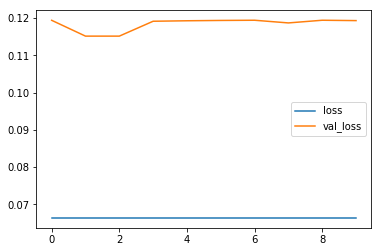

<Figure size 432x288 with 0 Axes>

In [17]:
training_epochs = 100
sgd = SGD(lr=1)
model.compile(optimizer=sgd , loss='mean_squared_error', metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=1, nb_epoch=10, verbose=1, validation_data=(X_test, y_test),  callbacks=[plot_losses],)


# Test The Model

In [34]:
from keras
y_proba = model.predict(X_test)
y_classes = probas_to_classes(y_proba[1])

NameError: name 'probas_to_classes' is not defined

In [29]:
if model.predict_classes(trial)==0:
    print("American Express Cobalt")
elif model.predict_classes(trial)==1:
    print("American Express Essential")
elif model.predict_classes(trial)==2:
    print("American Express Marriot Bonvoy")
elif model.predict_classes(trial)==3:
    print("American Express Simply Cash")
elif model.predict_classes(trial)==4:
    print("American Express Simply Cash Preferred")
elif model.predict_classes(trial)==5:
    print("Meridian Visa Infinite")
elif model.predict_classes(trial)==6:
    print("PC Financial Mastercard")
elif model.predict_classes(trial)==7:
    print("Scotiabank Momentum No-Fee Visa")
elif model.predict_classes(trial)==8:
    print("Scotiabank Momentum Visa Infinite")
elif model.predict_classes(trial)==9:
    print("Scotiabank SCENE Visa")
elif model.predict_classes(trial)==10:
    print("True Line Gold Mastercard")
elif model.predict_classes(trial)==11:
    print("True Line Mastercard")
elif model.predict_classes(trial)==12:
    print("American Express Blue Sky")
elif model.predict_classes(trial)==13:
    print("Not Enough")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()